<a href="https://colab.research.google.com/github/sfmoram/PDI-SM/blob/main/Lab_5_Segmentaci%C3%B3n_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkred'> **Quinto Laboratorio: Segmentación a color**

# <font color='darkred'> Cargar Líbrerias

In [ ]:
import numpy as np
from  cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2

# <font color='darkred'> Definir la función comoes

In [ ]:
def comoes(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# <font color='darkred'> Lectura de imagen a color

In [ ]:
!wget https://www.dropbox.com/s/jdqhk0gs126xvh6/flores.jpeg

--2023-03-22 15:18:43--  https://www.dropbox.com/s/jdqhk0gs126xvh6/flores.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jdqhk0gs126xvh6/flores.jpeg [following]
--2023-03-22 15:18:43--  https://www.dropbox.com/s/raw/jdqhk0gs126xvh6/flores.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc98072c681fa46eb7dcd21ef20.dl.dropboxusercontent.com/cd/0/inline/B4s8673hPnkA7NFkn9eJ6yfJjXC8ERq8os0ohHmx5UfAF8dMwcpHMZAcKM-wq3n6UxyYRiMpY3-QnLwhGCh6XKFHO2G6PtKlCuEH-UJu2e3c-ngOuSv66dC4Xcwmjzq-fH4FXvmD0bnXrWGM000s46yWqdAs8f1t5-B6HK3Q-lSiPQ/file# [following]
--2023-03-22 15:18:44--  https://ucc98072c681fa46eb7dcd21ef20.dl.dropboxusercontent.com/cd/0/inline/B4s8673hPnkA7NFkn9eJ6yfJjXC8ERq8os0ohHmx5UfAF8dMwcpHMZAcKM-wq3n6UxyYRiMpY3-QnLwhGCh

# <font color='darkred'>Lectura en formato opencv (BGR)

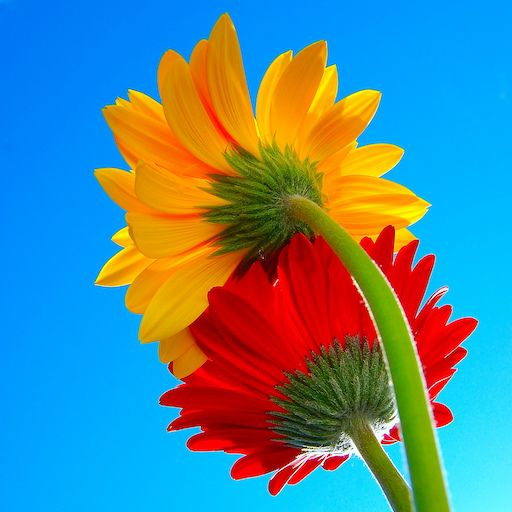

size =  (512, 512, 3)
max  =  255
min  =  0


In [ ]:
Icv = imread('flores.jpeg')
cv2_imshow(Icv)
comoes(Icv)

# <font color='darkred'>Conversion a formato estándar (RGB)

<font color='darkred'> Crea una nueva imagen I que es una reorganización de los canales de color de la imagen Icv. Específicamente, invierte el orden de los canales.

<font color='darkred'>En OpenCV, las imágenes se leen en formato BGR (Azul, Verde, Rojo), mientras que las funciones de visualización comunes, como plt.imshow de matplotlib, esperan que las imágenes estén en formato RGB (Rojo, Verde, Azul). Por lo tanto, este paso invierte el orden de los canales para adaptarse a la visualización con matplotlib.

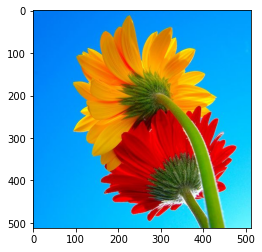

In [ ]:
I = Icv[:,:,[2,1,0]]
plt.imshow(I)
plt.show()

# <font color='darkred'>Canales de color

 <font color='darkred'>Toma una imagen en color I, extrae sus canales Rojo, Verde y Azul, y luego los concatena horizontalmente en una única imagen en escala de grises.

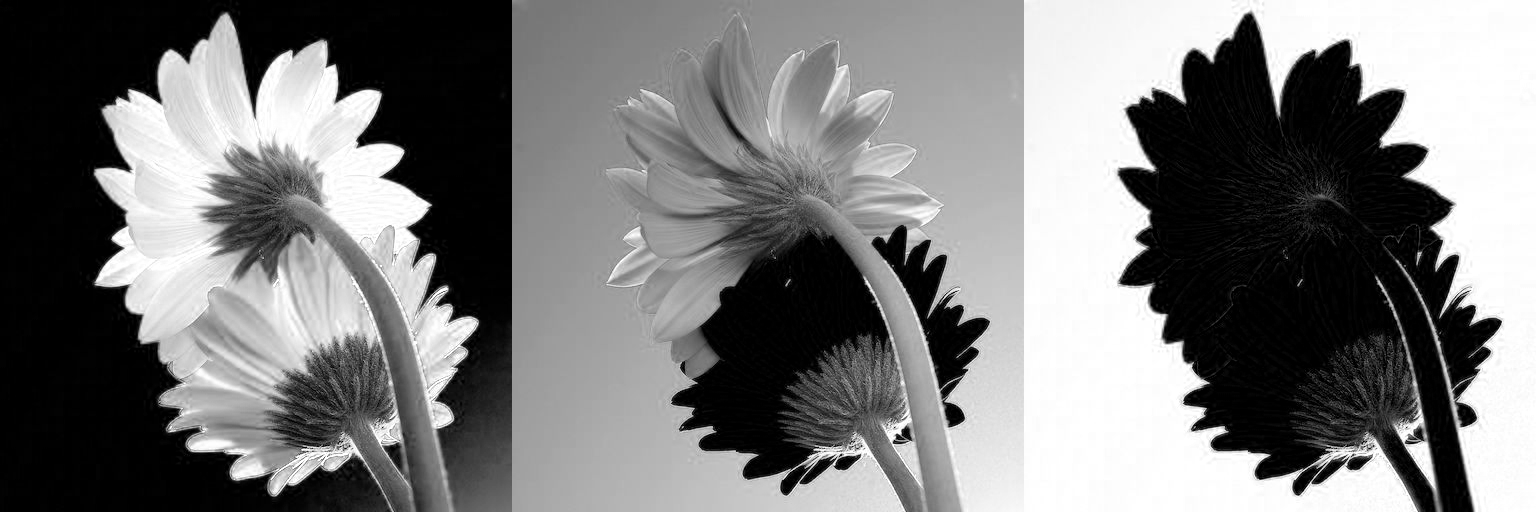

In [ ]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
cv2_imshow(RGB)

# <font color='darkred'>Conversion a blanco y negro (tonos de gris)

<font color='darkred'>Combina ponderadamente los canales R, G y B de una imagen en un único canal en escala de grises usando los pesos específicos definidos en k, y luego muestra la imagen resultante

size =  (512, 512)
max  =  254
min  =  0


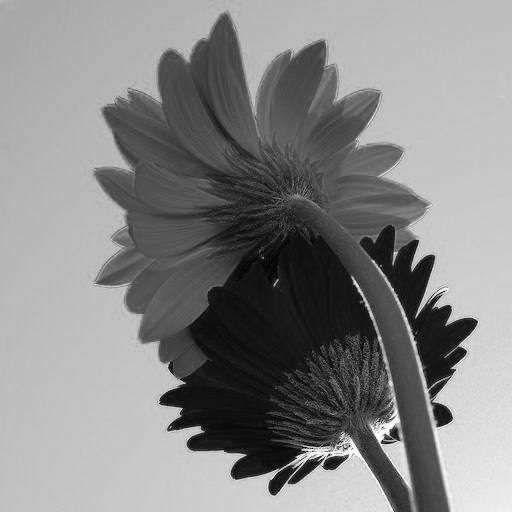

In [ ]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)

#Si se quita el comentario de la siguiente línea la ponderación es igual para los tres canales
#k  = (1/3,1/3,1/3)

# Ponderación de RGB, Red 10%, Green 40%, Blue 50%
k  = (0.1,0.4,0.5)

Zd = k[0]*Rd+k[1]*Gd+k[2]*Bd
Z  = Zd.astype(int)
comoes(Z)
cv2_imshow(Z)

# <font color='darkred'> Define la función **imhist** y visualiza el Histograma de la imagen anterior

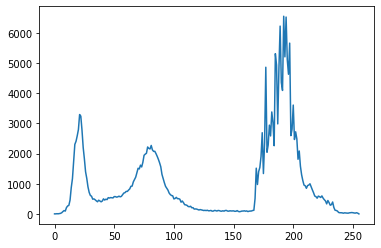

In [ ]:
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.plot(range(n),h[0:n])
  plt.show()

imhist(Z)

# <font color='darkred'>Segmentación de la Flor Roja

<font color='darkred'> Realiza operaciones para detectar ciertos rangos de intensidades en los canales de color Rojo, Verde y Azul (RGB) de una imagen.

<font color='darkred'>Identifica y visualiza regiones en los canales Rojo, Verde y Azul de una imagen que cumplen ciertos criterios de intensidad. Específicamente, muestra áreas donde el **Rojo es intensamente brillante**, y **el Verde y el Azul son oscuros**.

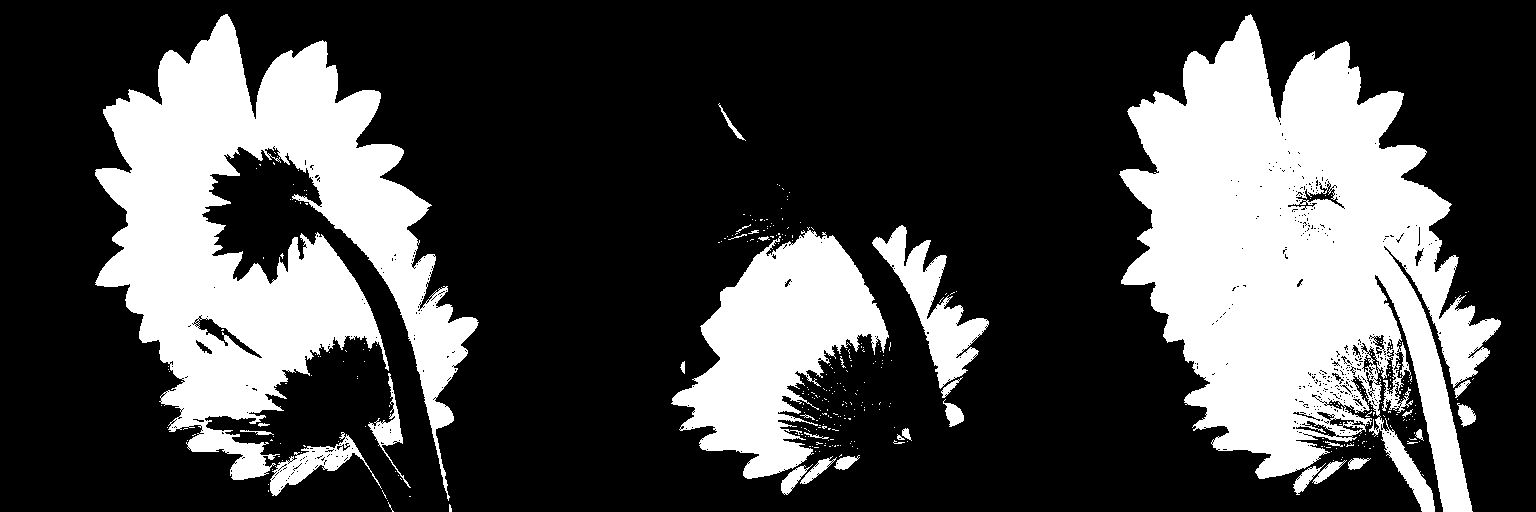

In [ ]:
Sr = R>150 #Crea una máscara booleana Sr donde todos los valores en el canal Rojo R que sean mayores que 150 son marcados como True y todos los otros valores como False.
Sg = G<40 #Crea una máscara booleana Sr donde todos los valores en el canal Green G que sean menores que 40 son marcados como True y todos los otros valores como False.
Sb = B<40 #Crea una máscara booleana Sr donde todos los valores en el canal Blue B que sean menores que 40 son marcados como True y todos los otros valores como False.

Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
cv2_imshow(Srgb*255)

# <font color='darkred'>Resultado de la segmentación

<font color='darkred'> Realiza una operación lógica "AND" entre tres máscaras booleanas (representando condiciones sobre los canales de color Rojo, Verde y Azul) y luego muestra el resultado.

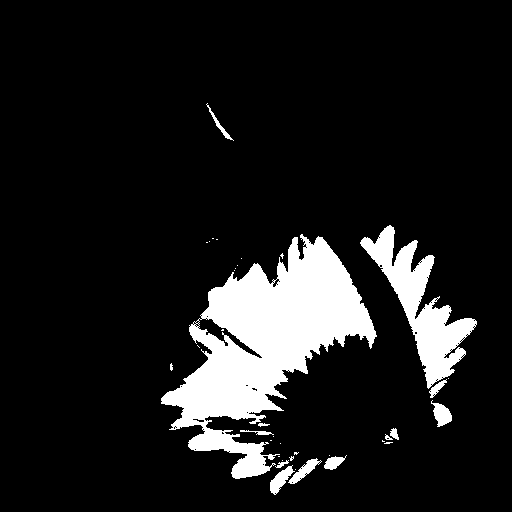

In [ ]:
S = np.logical_and(Sr,Sg,Sb)
cv2_imshow(S*255)

# <font color='darkred'>Eliminación de filas con pocos unos

<font color='darkred'>Procesa una imagen binaria (máscara) S, en la que busca filas que tengan una cantidad baja de píxeles activos (valores True o 1) y luego las pone a cero (desactiva todos los píxeles en esas filas).

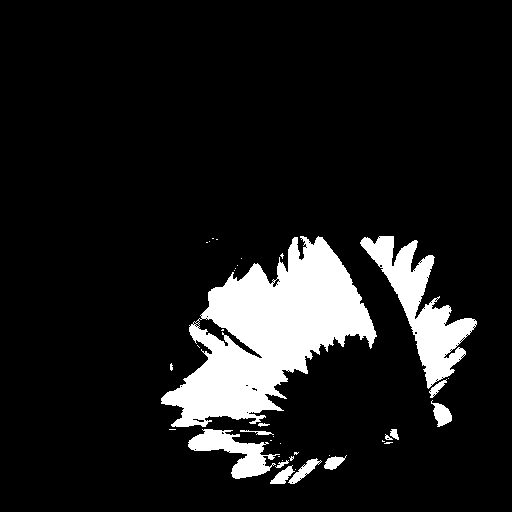

In [ ]:
(N,M) = S.shape
Q = S
for i in range(N):
  s = np.sum(S[i,:])
  if s<20:
    Q[i,:] = 0
cv2_imshow(Q*255)

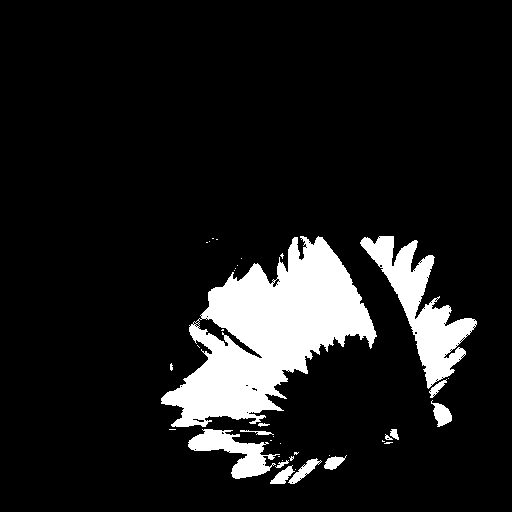

In [ ]:
#Para la clase de operadores morfologicos

#imgX = cv2.imread('/content/prueba.png',0)
#cv2_imshow(imgX)

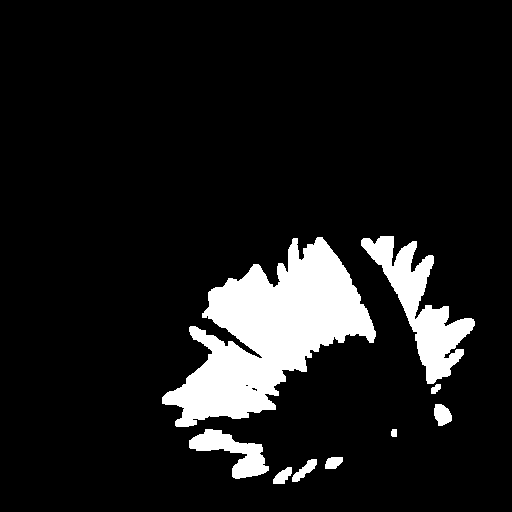

In [ ]:
#Para la clase de operadores morfologicos

kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(imgX, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

# <font color='darkred'>Búsqueda de (imin,jmin) y (imax,jmax) en la región segmentada

<font color='darkred'>Recorre una imagen Q buscando los límites donde ocurren píxeles activos (en este contexto, valores mayores a 0). Los límites identificados representan la región rectangular mínima que encierra todos los píxeles activos.

In [ ]:
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if Q[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

# <font color='darkred'>Gráfica de Bounding Box

<font color='darkred'> Visualiza la imagen I y superpone un contorno (en este caso, un rectángulo) basado en los límites determinados por las listas x y y. Este rectángulo marca la región rectangular mínima que encierra todos los píxeles activos que se identificaron previamente.

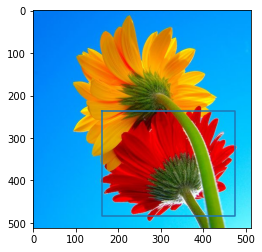

In [ ]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y)
plt.show()

# <font color='darkred'>Detección de Bordes

<font color='darkred'>Identifica y resalta los bordes en la imagen binaria Q y muestra el resultado en una imagen E

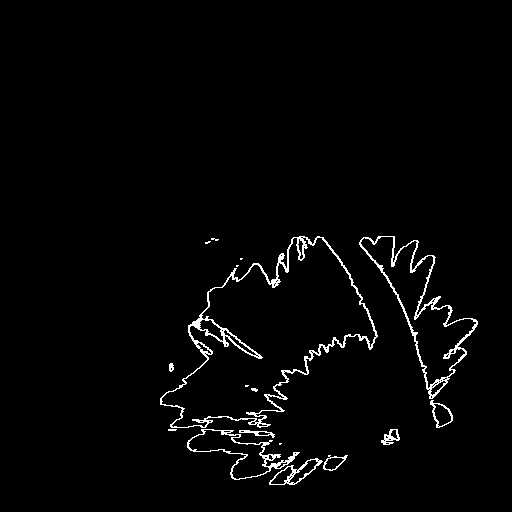

In [ ]:
E = np.zeros((N,M),np.uint8)
for i in range(N):
  for j in range(1,M):
    if Q[i,j]!=Q[i,j-1]:
      E[i,j]   = 1
      E[i,j-1] = 1
for i in range(1,N):
  for j in range(M):
    if Q[i-1,j]!=Q[i,j]:
      E[i,j]   = 1
      E[i,j-1] = 1
cv2_imshow(E*255)

# <font color='darkred'>Resultado

<font color='darkred'>Resalta (o sobrepone) en azul los bordes identificados en la matriz binaria E sobre la imagen original Icv.

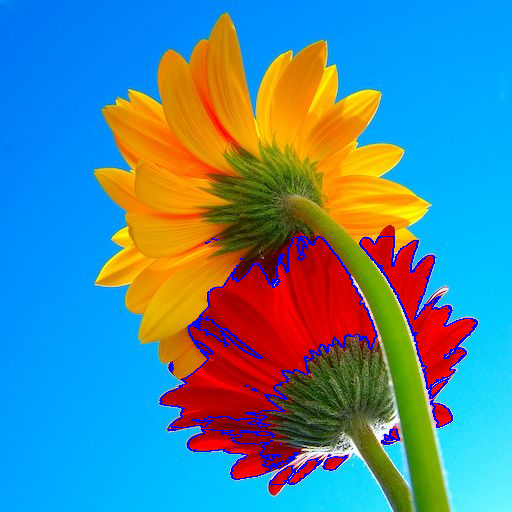

In [ ]:
for i in range(N):
  for j in range(M):
    if E[i,j]==1:
      Icv[i,j,:] = [255,0,0]
cv2_imshow(Icv)